# Install & Import packages

In [33]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [34]:
# 설치된 글꼴 이름 파악을 위해서!!
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc

# 설정 파일 위치 확인
print(mpl.matplotlib_fname())
print(mpl.__file__)

# Jupyter Notebook 로드 시 같이 올라온 font 목록 확인
[f.fname for f in fm.fontManager.ttflist]	# NanumGothic.ttf 목록에서 확인 완료!!!

# NanumGothic 설정 확인
plt.rcParams['font.family'] = 'NanumGothic'
print(plt.rcParams['font.family'])		# NanumGothic 설정 제대로 먹힌 것을 확인!!!

# 마이너스(-)가 '□'로 깨지는 것을 방지하기 위하여 설정!!!
mpl.rcParams['axes.unicode_minus'] = False

# matplotlib 차트에 한글이 제대로 표시되는지 확인
# plt.text(0.3, 0.3, '한글', size = 100)

/home/ubuntu/anaconda3/envs/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc
/home/ubuntu/anaconda3/envs/venv/lib/python3.10/site-packages/matplotlib/__init__.py
['NanumGothic']


In [19]:
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피쳐'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    return summary

# Import Data

In [20]:
df = pd.read_csv('1004_df.csv', low_memory=False)

In [21]:
df.shape

(114600, 437)

In [37]:
life.date.unique()

array([2208, 2210, 2212, 2302, 2304, 2306])

In [42]:
life.lb08m.unique()

array([100000., 113000.,  94000.,  93000.,  98000.,  97000., 106000.,
       117000., 123000., 111000., 110000., 121000., 112000., 144000.,
       135000., 153000., 151000.,  99000.,  96000.,  92000., 103000.,
       116000., 118000., 137000., 101000., 105000., 114000., 143000.,
       154000., 109000.,  95000., 115000., 142000., 149000., 102000.,
       124000., 138000., 150000., 155000., 119000., 108000., 122000.,
       136000., 126000., 107000., 132000., 156000., 145000., 187000.,
       172000., 104000., 127000., 158000., 182000., 170000., 141000.,
       159000., 175000., 167000., 129000., 125000., 152000., 139000.,
       171000., 166000., 128000., 130000., 147000., 133000., 168000.,
        87000.,  88000., 189000.,  84000.,  91000.,  82000.,  90000.,
        86000., 140000., 179000.,  89000., 146000., 134000., 161000.,
       160000., 176000., 164000., 120000., 162000., 131000., 169000.,
       178000., 194000., 163000., 183000., 157000., 148000., 177000.,
       165000., 1860

In [22]:
# 결측치가 존재하지 않는 신한라이프  데이터 추출
life = df[df['la01r'].notna()]
life.head()

,date,gender,age,region,ba01m,ba02m,ba03r,ba04m,ba05r,ba06m,...,lf02r,lf03r,lf04r,lf05r,lf06r,lf07r,광역시도명,시군구명,구명,행정동명
0,2208,F,20e,11110515,9378000,3775000,0.01000,333000,0.57000,6153000,...,0.71000,0.24000,0.15000,0.19000,0.48000,0.19000,서울,종로구,NaN,청운효자동
1,2208,F,20s,11110515,4836000,1784000,0.00000,0,0.51000,3587000,...,0.59000,0.19000,0.26000,0.18000,0.41000,0.15000,서울,종로구,NaN,청운효자동
2,2208,F,30e,11110515,14055000,4079000,0.02000,104000,0.44000,9411000,...,0.69000,0.23000,0.14000,0.23000,0.45000,0.17000,서울,종로구,NaN,청운효자동
3,2208,F,30s,11110515,9092000,4322000,0.02000,2700000,0.54000,5482000,...,0.72000,0.23000,0.12000,0.21000,0.50000,0.17000,서울,종로구,NaN,청운효자동
4,2208,F,40e,11110515,18031000,6818000,0.03000,3084000,0.34000,4927000,...,0.70000,0.22000,0.14000,0.25000,0.44000,0.17000,서울,종로구,NaN,청운효자동


In [24]:
life = pd.concat([life.iloc[:,:4], life.iloc[:,-64:]],axis=1)
life.shape

(92277, 68)

In [25]:
summary(life)

# 기준년월 6개
# 연령대 10개
# 지역 955개

,피쳐,데이터 타입,결측값 개수,고유값 개수,첫번째 값,두번째 값
0,date,int64,0,6,2208,2208
1,gender,object,0,2,F,F
2,age,object,0,10,20e,20s
3,region,int64,0,955,11110515,11110515
4,la01r,float64,0,78,0.20000,0.32000
...,...,...,...,...,...,...
63,lf07r,float64,0,52,0.19000,0.15000
64,광역시도명,object,0,8,서울,서울
65,시군구명,object,0,70,종로구,종로구
66,구명,object,89092,15,NaN,NaN


In [26]:
pd.options.display.float_format = '{:.5f}'.format
a = life.describe().T.reset_index()
b = life[[idx for idx , type_ in zip(life.dtypes.index, life.dtypes) if type_=='object']].describe().T.reset_index()

In [27]:
a = a.set_index('index')

In [28]:
# 데이터프레임 내에서 0보다 작은 값이 있는지 확인하고 그 위치를 찾는 코드입니다.
negative_values = (a < 0).sum().sum()

if negative_values > 0:
    print("데이터프레임에 0보다 작은 값이 있습니다.")
    negative_positions = life[life < 0].stack().index.tolist()
    print("0보다 작은 값의 위치: ")
    print(negative_positions)
else:
    print("데이터프레임에 0보다 작은 값이 없습니다.")

데이터프레임에 0보다 작은 값이 없습니다.


## 최근 1년 어린이 보험계약 고객의 비율 vs  어린이 보험계약 고객 비율

### 1. 신규 어린이 보험 계약이 증가하는 이유

저출산으로 젊은 세대 인구가 급속도로 줄자 보험사들은 ‘35세 성인까지 가입할 수 있는 어린이 보험’을 내세우며 치열한 마케팅 경쟁을 벌였다. 어른도 들 수 있는 어린이보험이라며 ‘어른이보험(어른+어린이보험)’이라는 말까지 생겼다. 부모와 자식이 나란히 어린이보험에 들기도 한다.  
https://www.chosun.com/economy/money/2023/08/28/4CRAIJMUORHEJLTQEQKN5DS4H4/

### 2. 전체 어린이 보험 계약 비율이 하락하는 이유
저출산으로 인하여 어린이보험의 신규 가입률이 증가하더라도 전체 인구 대비 어린이 보험 가입률은 감소하는 것으로 파악된다.  
즉, 신규 가입은 증가하지만, 전체 어린이 인구 대비로 보면 그 비율이 감소하는 것은 어린이 인구 자체의 감소 (저출산) 때문일 수 있으며, 이는 전체 어린이 보험 가입률의 하락을 의미한다.

따라서 동일한 수의 신규 가입이 있더라도, 저출산으로 인해 전체 어린이 인구가 감소하면 그로 인해 전체 어린이 보험 가입률이 하락하는 것으로 나타날 수 있습니다.

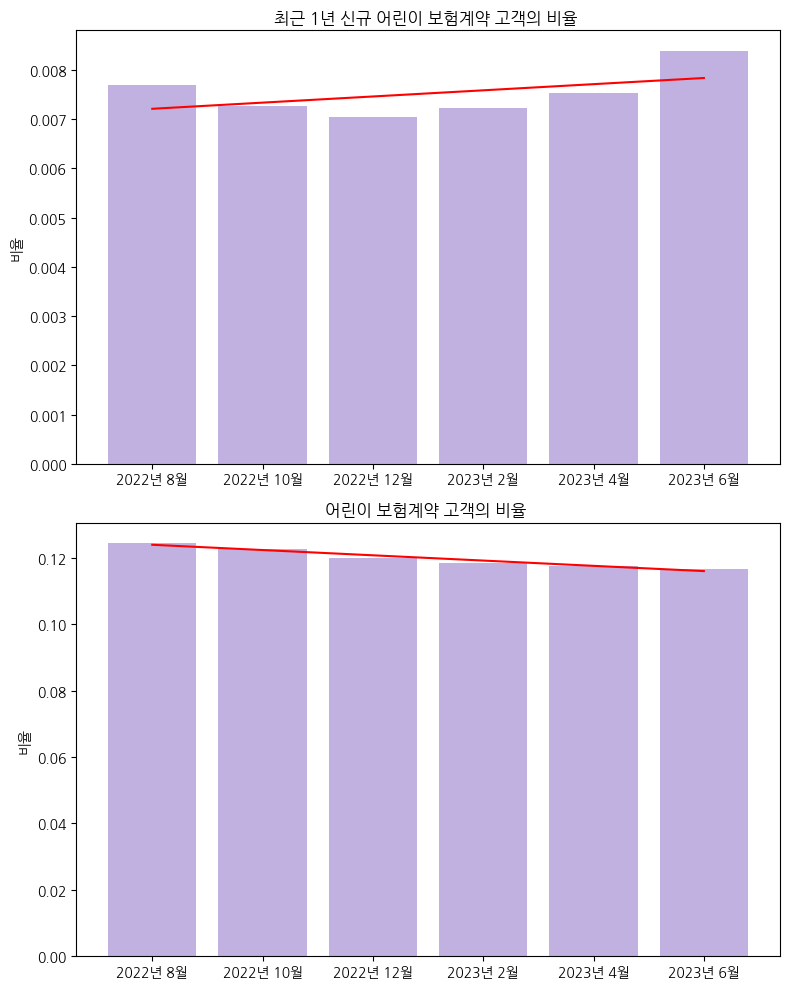

In [29]:
# 그래프 크기 설정
plt.figure(figsize=(8,10))

# 1
plt.subplot(2, 1, 1)
sns.barplot(x='date', y='la04r', data=life, color='mediumpurple', alpha=0.6, label='la04r', errorbar=None)
plt.ylabel("비율")
plt.xlabel('')

labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
plt.xticks(range(len(labels)), labels)

plt.title('최근 1년 신규 어린이 보험계약 고객의 비율 ')
# 추세선을 위한 데이터
x_dates = df['date'].unique()  # 중복을 제거한 date 값
x_indices = np.arange(len(x_dates))  # x축 인덱스

# 선형 회귀 모델로 추세선 계수 계산
slope, intercept, _, _, _ = linregress(x_indices, life.groupby('date')['la04r'].mean())

# 추세선 그리기
plt.plot(x_indices, intercept + slope * x_indices, color='red', label='Trendline')


#2
plt.subplot(2, 1, 2)
sns.barplot(x='date', y='lb04r', data=life, color='mediumpurple', alpha=0.6, label='la04r', errorbar=None)
plt.ylabel("비율")
plt.xlabel('')

labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
plt.xticks(range(len(labels)), labels)

plt.title('어린이 보험계약 고객의 비율 ')

# 추세선을 위한 데이터
x_dates = df['date'].unique()  # 중복을 제거한 date 값
x_indices = np.arange(len(x_dates))  # x축 인덱스

# 선형 회귀 모델로 추세선 계수 계산
slope, intercept, _, _, _ = linregress(x_indices, life.groupby('date')['lb04r'].mean())

# 추세선 그리기
plt.plot(x_indices, intercept + slope * x_indices, color='red', label='Trendline')
plt.savefig('저출산 savefig.png')
# 레이아웃 조정
plt.tight_layout()
plt.show()



In [31]:
# 청년층 연령대 정의
young_ages = ['20e', '20s', '30e', '30s']

# 청년층 데이터 필터링
young_df = life[life['age'].isin(young_ages)]

# 청년층과 그 외 연령대로 데이터 분리
other_ages_df = life[~life['age'].isin(young_ages)]

In [ ]:
result.dtypes

In [ ]:
def age_column_hue_plot(y, temp):

    ages = ['20e', '20s', '30e', '30s', '40e', '40s', '50e', '50s', '60e',
       '60s']
    plt.figure(figsize=(25, 10))
    
    palette = {age: 'grey' for age in ages}
    palette['20e'] = 'mediumpurple'
    palette['20s'] = 'mediumpurple'
    palette['30e'] = 'mediumpurple'
    palette['30s'] = 'mediumpurple'
    sns.barplot(x='date', y=y, hue='age', data=df, errorbar=None, palette=palette, edgecolor='black')
    
    # 그래프의 제목과 x, y축 라벨을 설정합니다.
    plt.title(temp)
    plt.xlabel('기준일자')
    plt.ylabel('비율')
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    
    # X축 라벨 바꾸기
    labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
    plt.xticks(range(len(labels)), labels)

    # 레전드 크기 줄이기
    plt.legend(title_fontsize='10', labelspacing=0.3)
    plt.savefig(temp+'savefig.png')
    
    plt.show()

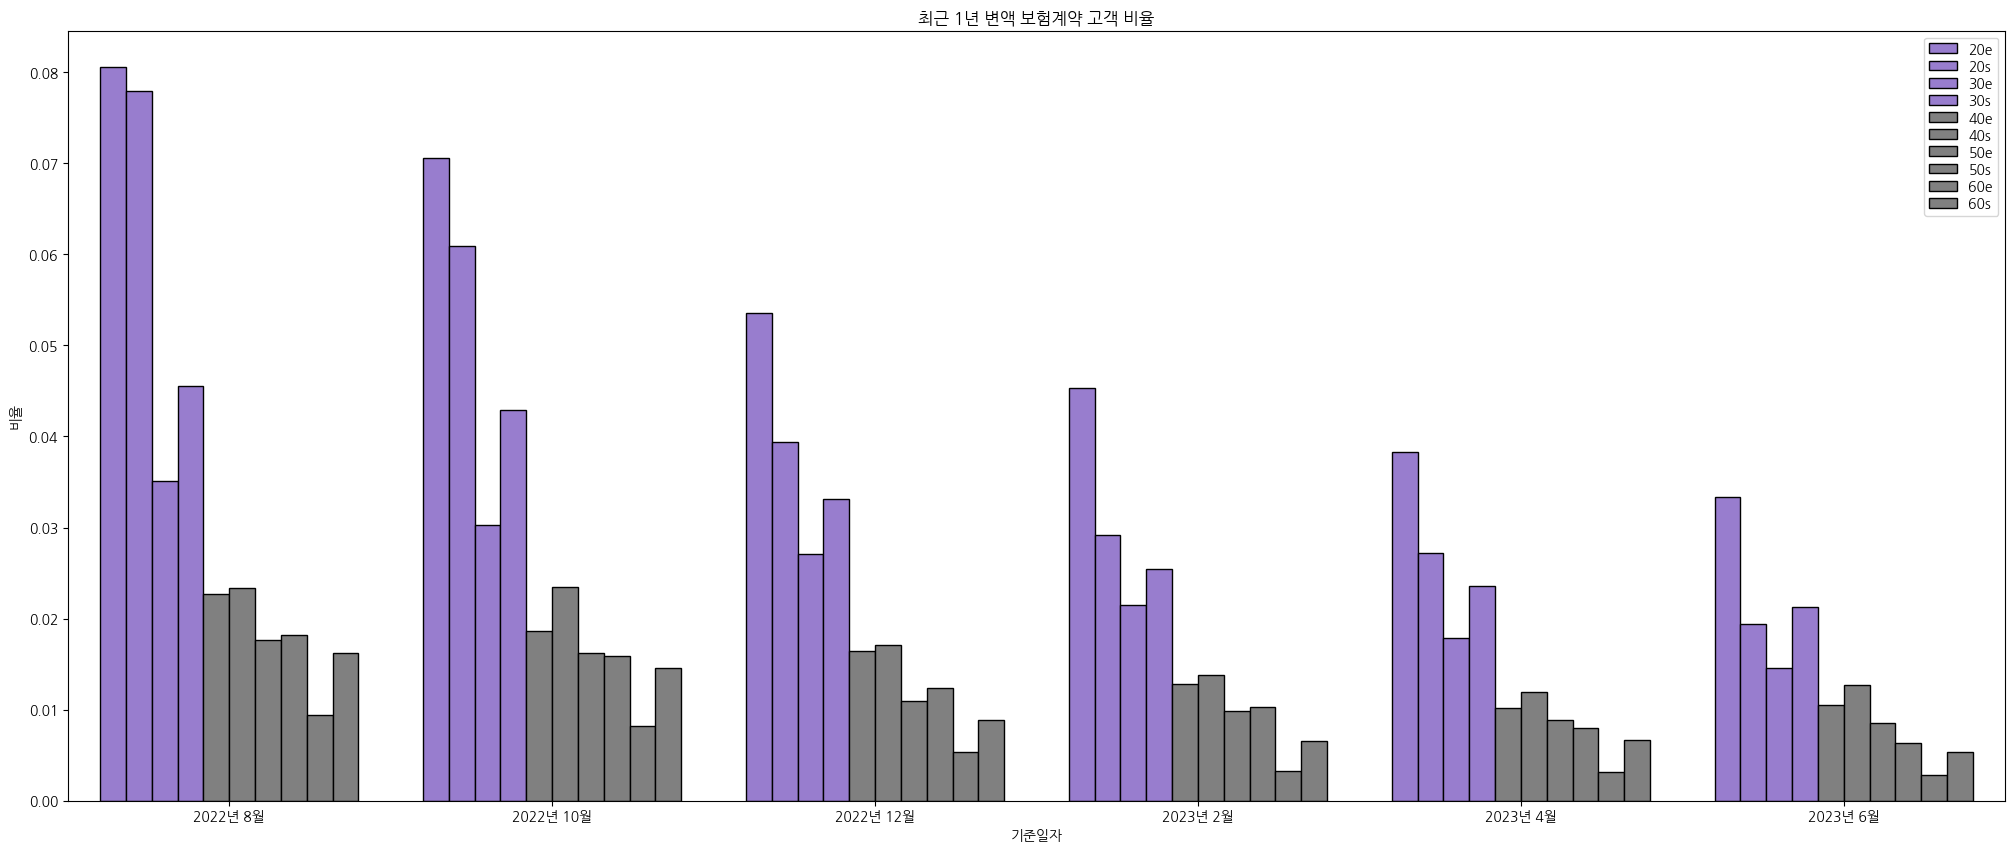

In [116]:
# 평균 주택대출평잔
age_column_hue_plot('la06r','최근 1년 변액 보험계약 고객 비율')

In [ ]:
# 그래프 크기 설정
plt.figure(figsize=(8,10))

# 1
plt.subplot(2, 1, 1)
sns.barplot(x='date', y='la06r', data=young_df, color='mediumpurple', alpha=0.6, label='la06r', errorbar=None)
plt.ylabel("비율")
plt.xlabel('')

labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
plt.xticks(range(len(labels)), labels)

plt.title('최근 1년 신규 어린이 보험계약 고객의 비율 ')
# 추세선을 위한 데이터
x_dates = df['date'].unique()  # 중복을 제거한 date 값
x_indices = np.arange(len(x_dates))  # x축 인덱스

# 선형 회귀 모델로 추세선 계수 계산
slope, intercept, _, _, _ = linregress(x_indices, young_df.groupby('date')['la06r'].mean())

# 추세선 그리기
plt.plot(x_indices, intercept + slope * x_indices, color='red', label='Trendline')


#2
plt.subplot(2, 1, 2)
sns.barplot(x='date', y='la06r', data=other_ages_df, color='mediumpurple', alpha=0.6, label='la06r', errorbar=None)
plt.ylabel("비율")
plt.xlabel('')

labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
plt.xticks(range(len(labels)), labels)

plt.title('신규 어린이 보험계약 고객의 비율 ')

# 추세선을 위한 데이터
x_dates = df['date'].unique()  # 중복을 제거한 date 값
x_indices = np.arange(len(x_dates))  # x축 인덱스

# 선형 회귀 모델로 추세선 계수 계산
slope, intercept, _, _, _ = linregress(x_indices, other_ages_df.groupby('date')['la06r'].mean())

# 추세선 그리기
plt.plot(x_indices, intercept + slope * x_indices, color='red', label='Trendline')

# 레이아웃 조정
plt.tight_layout()
plt.show()



#### 1. 리스크 허용도  
청년층이 변액 보험에 더 많이 투자하고 있는 것은 이 연령대의 고객이 "높은 리스크를 수반하는 대신 높은 수익률을 추구하려는 성향"이 있음을 나타낼 수 있습니다.  

#### 2. 투자 기간과 목적     
청년층은 일반적으로 더 긴 투자 기간을 가질 수 있으며, 높은 수익률을 추구하는 경향이 있을 수 있습니다.  
연금저축 보험은 노후 준비와 관련된 저축 목적으로 가입하는 경우가 많은데, 청년층은 노후 준비를 미룰 가능성이 있으므로 이러한 보험 상품에 덜 관심을 가질 수 있습니다.

# 최근1년 신규 변액보험 vs 최근1년 신규 연금저축 보험


- 최근 1년 신규 연금저축 보험계약 고객의 비율을 살펴본 결과, 2022년 12월 이후, 40~60대의 비율의 2030에 비해 월등히 차이가 났음이 나타났다.
-  특히 2023년 이후엔 약 3%가량 차이가 났다. 
- 더불어, 최근 1년 변액보험계약 고객의 비율도 매 기준년월 청장년 (2030)의 비율이 타 연령대에비해 평균 2%가량 높음이 나타났다. 

In [97]:
def age_column_hue_plot(y, temp):

    ages = ['20e', '20s', '30e', '30s', '40e', '40s', '50e', '50s', '60e',
       '60s']
    plt.figure(figsize=(25, 10))
    
    palette = {age: 'grey' for age in ages}
    palette['20e'] = 'mediumpurple'
    palette['20s'] = 'mediumpurple'
    palette['30e'] = 'mediumpurple'
    palette['30s'] = 'mediumpurple'
    sns.barplot(x='date', y=y, hue='age', data=df, errorbar=None, palette=palette, edgecolor='black')
    
    # 그래프의 제목과 x, y축 라벨을 설정합니다.
    plt.title(temp)
    plt.xlabel('기준일자')
    plt.ylabel('비율')
    
    # X축 라벨 바꾸기
    labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
    plt.xticks(range(len(labels)), labels)

    # 레전드 크기 줄이기
    plt.legend(title_fontsize='10', labelspacing=0.3)
    plt.savefig(temp+'savefig.png')
    
    plt.show()

In [103]:
# def age_column_hue_plot_filtered(y, temp):
#     # 날짜 필터링
#     filtered_df = life[life['date'].isin([2208, 2306])]
    
#     ages = ['20e', '20s', '30e', '30s', '40e', '40s', '50e', '50s', '60e', '60s']
#     plt.figure(figsize=(12, 6))
    
#     palette = {age: 'grey' for age in ages}
#     palette['20e'] = 'mediumpurple'
#     palette['20s'] = 'mediumpurple'
#     palette['30e'] = 'mediumpurple'
#     palette['30s'] = 'mediumpurple'
#     sns.barplot(x='date', y=y, hue='age', data=filtered_df, errorbar=None, palette=palette, edgecolor='black')
    
#     # 그래프의 제목과 x, y축 라벨을 설정합니다.
#     plt.title(temp)
#     plt.xlabel('')  # X축 라벨 제거
#     plt.ylabel('비율')
    
#     # X축 라벨 바꾸기
#     labels = ['2021년 8월 ~ 2022년 8월', '2022년 6월 ~ 2023년 6월']
#     plt.xticks(range(len(labels)), labels)

#     # 레전드 크기 줄이기
#     plt.legend(title_fontsize='10', labelspacing=0.3)
    
#     plt.show()

# # 함수 호출하여 그래프 그리기
# age_column_hue_plot_filtered('la05r', '최근1년 신규 연금저축 보험계약 고객의 비율')


In [102]:
# # 최근1년 신규 연금저축 보험
# age_column_hue_plot('la05r','최근1년 신규 연금저축 보험계약 고객의 비율')

# # 최근1년 신규 변액보험
# age_column_hue_plot('la06r','최근1년 신규 변액 보험계약 고객의 비율')

## 변액 보험계약 고객 비율 vs 연금저축 보험계약 고객 비율
청장년과 이외 연령대의 보험 계약 특징을 비교해보았습니다.

#### 변액 보험계약 고객 비율 (lb06r):

- 청년층에서 더 높은 변액 보험계약 고객 비율을 가진 고객들이 그 외 연령대에 비해 더 많은 것으로 보입니다.
청년층은 높은 리스크를 감수하며 높은 수익률을 추구하는 경향이 있음을 나타냅니다.
#### 연금저축 보험계약 고객 비율 (lb05r):

- 두 연령대 모두 비슷한 분포를 보이고 있으나, 그 외 연령대에서 더 높은 비율의 고객이 있는 것으로 보입니다.
이는 그 외 연령대가 노후를 대비한 저축 및 투자의 중요성을 더욱 인식하고 있음을 나타낼 수 있습니다.
#### 결론:
- 히스토그램을 통해 청년층이 높은 리스크를 감수하는 경향이 있으며, 이는 변액 보험계약 고객 비율의 분포에서 잘 드러납니다. 이러한 정보를 바탕으로 청년층을 타겟으로 한 금융 상품이나 마케팅 전략을 개발하는 데 참고할 수 있습니다.

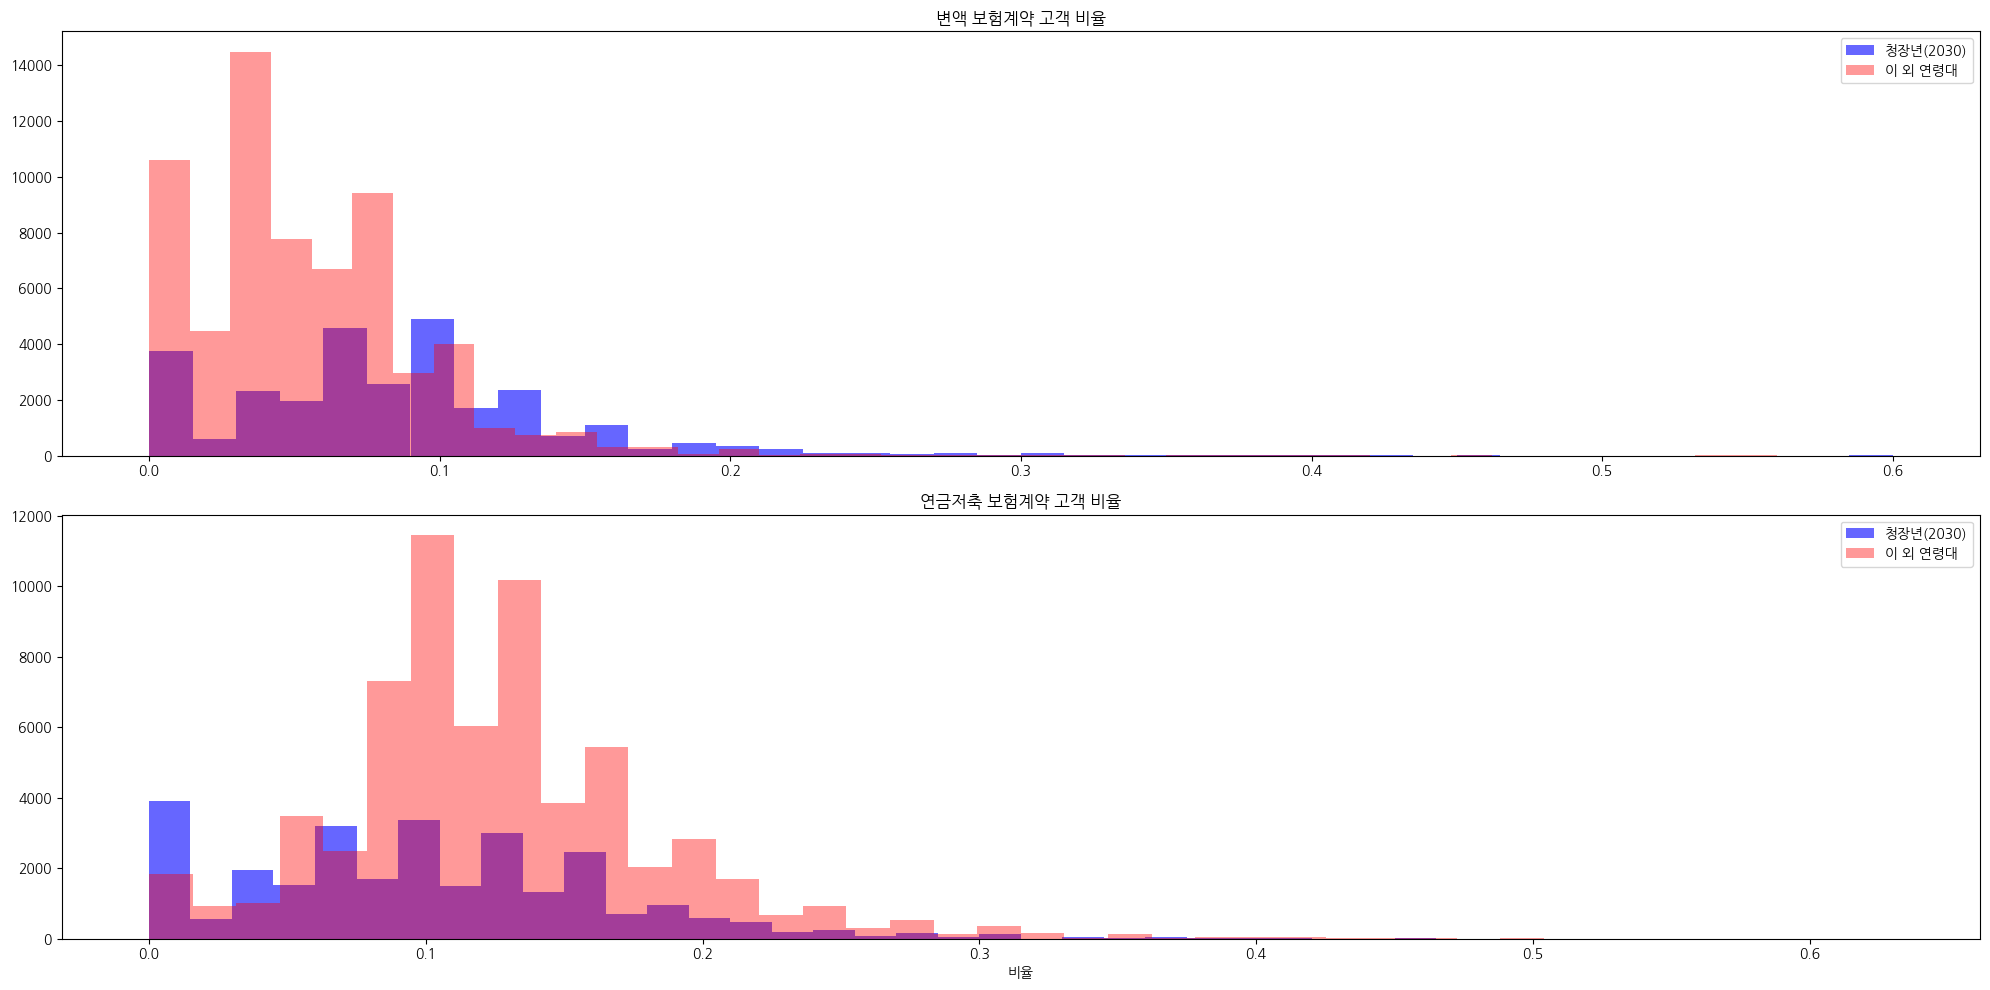

In [36]:
# 히스토그램을 사용하여 청년층과 그 외 연령대의 lb06r과 lb05r 분포 비교
plt.figure(figsize=(20, 10))

# 변액 보험계약 고객 비율 (lb06r)의 분포
plt.subplot(2, 1, 1)
plt.hist(young_df['lb06r'], bins=40, alpha=0.6, label='청장년(2030)', color='b')
plt.hist(other_ages_df['lb06r'], bins=40, alpha=0.4, label='이 외 연령대', color='r')
plt.title('변액 보험계약 고객 비율')
# plt.xlabel('q')
plt.legend()

# 연금저축 보험계약 고객 비율 (lb05r)의 분포
plt.subplot(2, 1, 2)
plt.hist(young_df['lb05r'], bins=40, alpha=0.6, label='청장년(2030)', color='b')
plt.hist(other_ages_df['lb05r'], bins=40, alpha=0.4, label='이 외 연령대', color='r')
plt.title('연금저축 보험계약 고객 비율')
plt.xlabel('비율')

plt.legend()
plt.savefig('변액,연금저축 savefig.png')
plt.tight_layout()
plt.show()


In [ ]:
young_df.groupby('date')['la06r'].mean()


# 초기 비율과 최종 비율
initial_ratio = 0.05357
final_ratio = 0.02199

# 증가율 계산
increase_percentage = ((final_ratio - initial_ratio) / initial_ratio) * 100

increase_percentage


- 그러나 청년대의 신규 연금저축 보험과 신규 변액 보험계약의 가입 추이를 확인한 결과 그들의 양상은 달라지고있었다.
- 최근1년간 청년들의 신규 연금저축보험 가입 비율은 그림과 같이 증가 추세를 보인다  
        이는 초기 21년 8월~ 22년 8월 신계약 대비 22년 6월~23년 6월 약 74.4% 증가하엿음을 알 수 있다.
- 더불어 최근1년 신규 변액 보험계약 고객의 비율은 꾸준한 감소 추세를 보인다.  
        이는 초기 21년 8월~ 22년 8월 신계약 대비 22년 6월~23년 6월 약 59%가 감소하였음을 확인하였다.

- 이로써, 청년들이 타 연령대에 비하여 연금저축보험의 가입 양상은 적고 변액 보험계약 고객 비율은 월등히 높지만, 기준년월별 최근 1년간의 양상을 살펴보니 미래에 대한 대비에 더 관심을 갖고있음을 확인하였다.

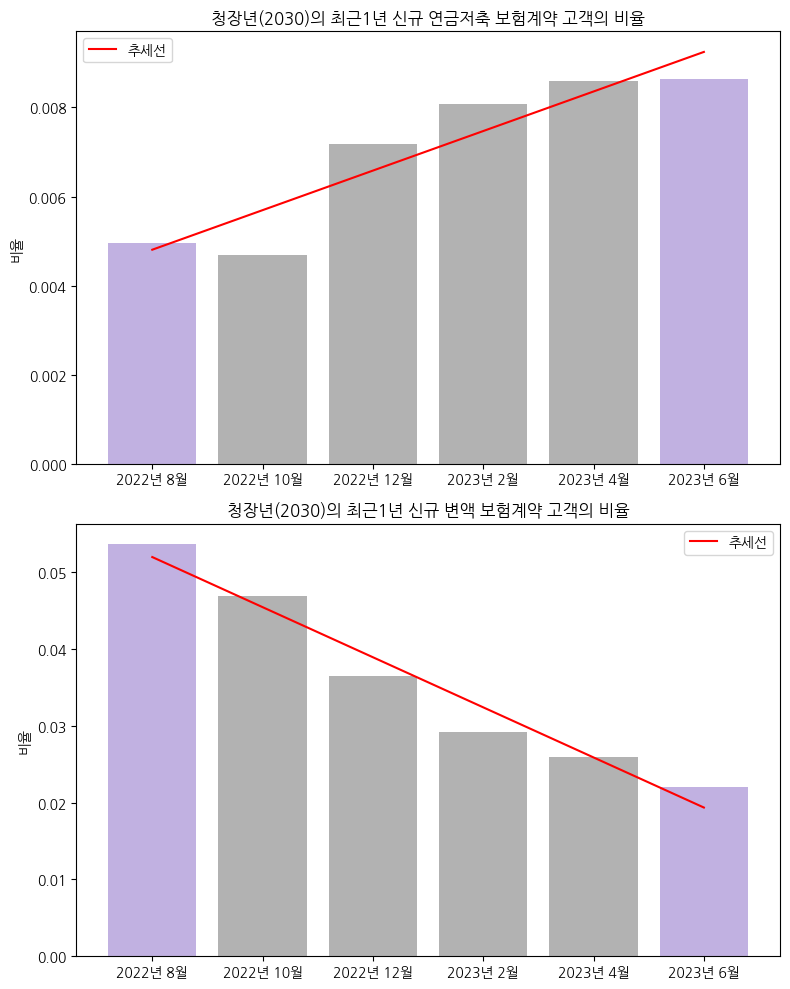

In [32]:

# Function to plot the barplot with specific color for August 2022 and June 2023
def plot_colored_barplot(y, title, subplot_position):
    plt.subplot(2, 1, subplot_position)
    
    # Colors for the bars, grey for all dates except August 2022 and June 2023
    bar_colors = ['mediumpurple' if date in [2208, 2306] else 'grey' for date in young_df['date'].unique()]
    
    # Plotting the barplot
    ax = sns.barplot(x='date', y=y, data=young_df, palette=bar_colors, alpha=0.6, errorbar=None)
    
    # Labels and title
    plt.ylabel("비율")
    plt.xlabel('')
    labels = ['2022년 8월', '2022년 10월','2022년 12월', '2023년 2월','2023년 4월','2023년 6월']
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    # 추세선을 위한 데이터
    x_dates = df['date'].unique()  # 중복을 제거한 date 값
    x_indices = np.arange(len(x_dates))  # x축 인덱스
    
    # 선형 회귀 모델로 추세선 계수 계산
    slope, intercept, _, _, _ = linregress(x_indices, young_df.groupby('date')[y].mean())
    
    # 추세선 그리기
    plt.plot(x_indices, intercept + slope * x_indices, color='red', label='추세선')
    
    
    # Avoiding the duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), title_fontsize='10', labelspacing=0.3)

# Setting the figure size
plt.figure(figsize=(8, 10))

# Plotting the first barplot
plot_colored_barplot('la05r', '청장년(2030)의 최근1년 신규 연금저축 보험계약 고객의 비율', 1)

# Plotting the second barplot
plot_colored_barplot('la06r', '청장년(2030)의 최근1년 신규 변액 보험계약 고객의 비율', 2)

# Adjusting the layout
plt.tight_layout()
plt.savefig('2030 변액보험 savefig.png')
plt.show()


# 변액 보험계약 고객 비율 vs 연금저축 보험계약 고객 비율
23년 6월 기준

## violonplot




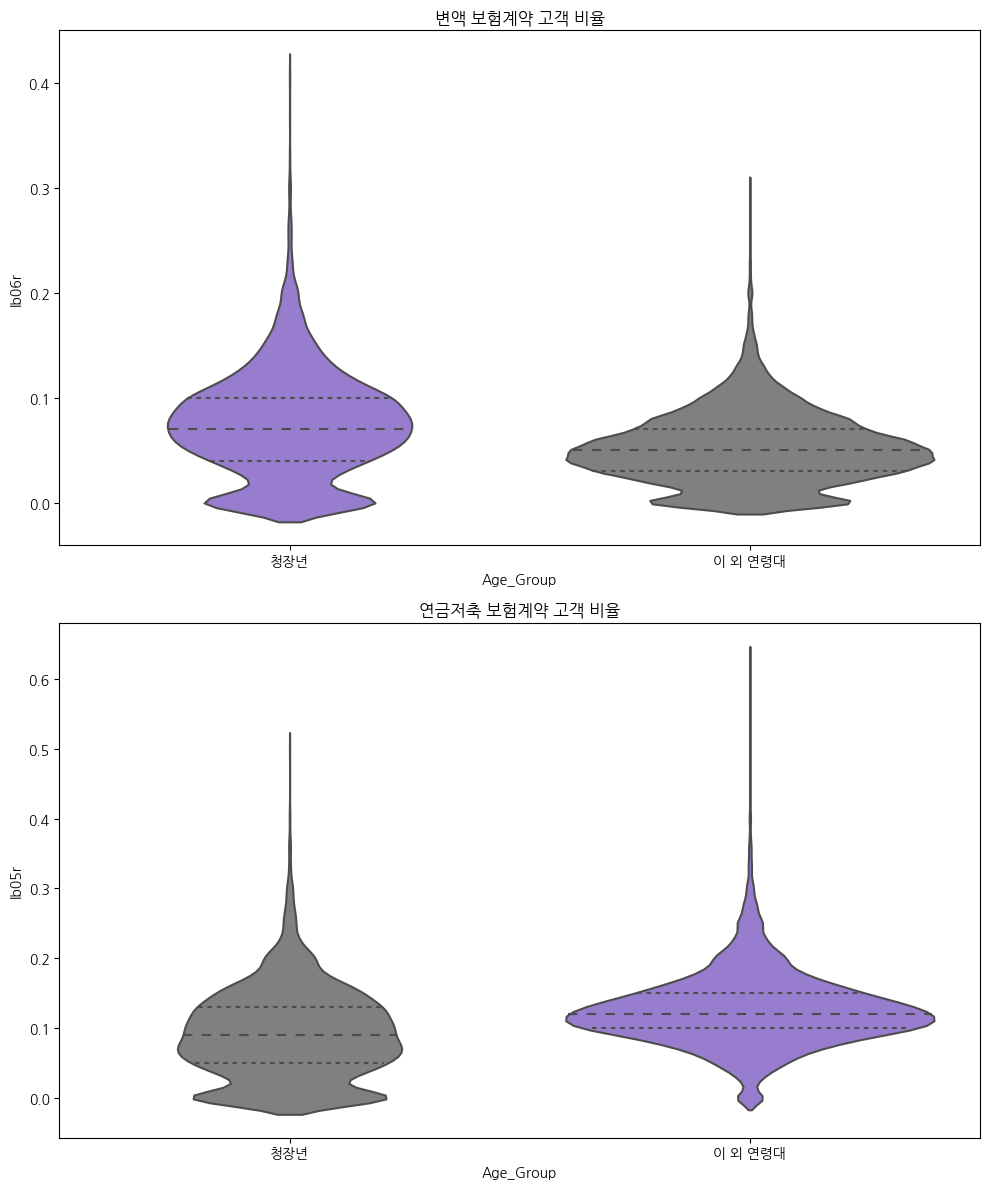

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 12))

# 청년층과 그 외 연령대의 데이터를 하나의 DataFrame으로 합칩니다.
combined_df = pd.concat([young_df.assign(Age_Group='청장년'), other_ages_df.assign(Age_Group='이 외 연령대')])

# la06r 비교
plt.subplot(2, 1, 1)
sns.violinplot(x='Age_Group', y='lb06r', data=combined_df, 
               inner='quartile', palette={'청장년': 'mediumpurple', '이 외 연령대': 'gray'})
plt.title('변액 보험계약 고객 비율')

# la05r 비교
plt.subplot(2, 1, 2)
sns.violinplot(x='Age_Group', y='lb05r', data=combined_df, 
               inner='quartile', palette={'청장년': 'gray', '이 외 연령대': 'mediumpurple'})
plt.title('연금저축 보험계약 고객 비율')

# 레이아웃 조정
plt.tight_layout()
plt.show()


#### 변액 보험계약 고객 비율 :
  
- 청년층의 변액 보험계약 고객 비율이 그 외 연령대에 비해 다양하게 분포하고 있습니다.
청년층에서는 이 비율이 높은 경우도 있으며, 그 외 연령대에 비해 높은 비율의 고객이 더 많습니다.
이는 청년층이 높은 리스크를 감수하고 높은 수익률을 추구하는 경향이 있음을 나타냅니다.
#### 연금저축 보험계약 고객 비율 :

- 청년층과 그 외 연령대 모두 비슷한 분포를 보이고 있으나, 그 외 연령대에서 약간 더 높은 비율의 고객이 있는 것으로 보입니다.
이는 그 외 연령대에서 노후를 대비한 저축 및 투자의 중요성을 더욱 인식하고 있음을 나타낼 수 있습니다.

#### 결론:
- 청년층은 높은 리스크를 감수하는 경향이 있으며, 이는 변액 보험계약 고객 비율의 분포에서 잘 드러납니다. 이러한 정보를 바탕으로 청년층을 타겟으로 한 금융 상품이나 마케팅 전략을 개발하는 데 참고할 수 있습니다.

# 최근 1년 어린이 보험계약 고객의 비율 증감 확인
## 데이터 처리
1. 데이터는 기간->연령->성별->행정동 별 비율을 나타내고있다
2. 이를 고려하지않고 기간별 혹은 연령별 평균을 구하는 경우, 분모(전체 보험가입자수)가 행정동별로 다르기 때문에 통계적으로 오류가 발생한다.
3. 따라서, 행정동별로 묶은 뒤, 행정동 별 기준일자에 따른 변화를 파악해야 정확한 비교가 가능하다.

## 추세식
1. 기준일자별 비교가 가능한 데이터를 추출하기 위해 주어진 날짜 (2208, 2210, 2212, 2302, 2304, 2306)가 모두 존재하고 lb04r이 모두 0이 아닌 값만 추출하였다. 
2. 이후 , 추세식을 세운 후, 그 추세가 음수인 경우 -1, 양수인경우 1, 0인경우 0으로 설정하였다.
3. 어린이 보험계약이 음의 관계를 보이는 행정동의 비율 = (추세가 음수인 행정동 /전체 행정동 수)


In [12]:
# 데이터 필터링 및 추세 계산 함수
given_dates = [2208, 2210, 2212, 2302, 2304, 2306]
from scipy.stats import linregress

def filter_and_plot_trends(age, gender):
    # 데이터 필터링
    filtered_data = life.query(f'age == "{age}" & gender == "{gender}"')[['date', 'la04r', '행정동명']]
    
    filtered_regions = []
    trends = []
    
    # 주어진 날짜가 모두 존재하고, 값들이 모두 0이 아닌 데이터를 한정
    for region, group in filtered_data.groupby('행정동명'):
        if all(date in group['date'].values for date in given_dates) and (group['la04r'] != 0).any():
            group = group[group['date'].isin(given_dates)]
            group = group.sort_values(by='date')  # 날짜별로 정렬
            
            x = np.arange(len(group))  # x 좌표
            y = group['la04r'].values  # y 좌표
            
            slope, _, _, _, _ = linregress(x, y)  # 추세선 계산
            
            trends.append(slope)
            filtered_regions.append(region)
    
    trends_df = pd.DataFrame({'행정동명': filtered_regions, '추세': trends})
    
    return trends_df


In [13]:
# print(life.query('행정동명 in @filtered_regions').광역시도명.unique())
# print(life.query('행정동명 in @filtered_regions').시군구명.unique())

In [17]:
trends_df = filter_and_plot_trends('30e',"F")
# display(trends_df)
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))
# trends_df
negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 후반 여성) : " , np.round(negative_trend_ratio,3))

최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 후반 여성) :  0.433


In [156]:
trends_df = filter_and_plot_trends('30s',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 초반 여성) : " , np.round(negative_trend_ratio,3))


최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 초반 여성) :  0.451


In [18]:
trends_df = filter_and_plot_trends('20s',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (20대 초반 여성) : " , np.round(negative_trend_ratio,3))


최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (20대 초반 여성) :  0.533


In [19]:
trends_df = filter_and_plot_trends('20e',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (20대 후반 여성) : " , np.round(negative_trend_ratio,3))

최근1년 신규 어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (20대 후반 여성) :  0.509


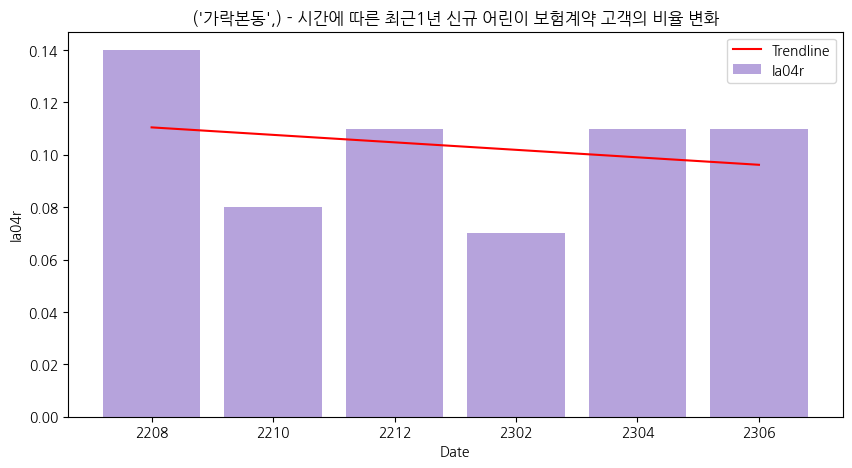

In [21]:
# 데이터 필터링
woman_30 = life.query('age == "30e" & gender == "F"')[['date', 'la04r','행정동명']]



# region 별로 그룹화하여 각 그룹에 대해 그래프 그리기
for (k1, group) in woman_30.groupby(['행정동명']):
    if (group['la04r'] > 0).all():  # la04r 값이 모두 0이 아닌 경우만 처리
        plt.figure(figsize=(10, 5))

        # barplot 그리기
        sns.barplot(data=group, x='date', y='la04r', color="mediumpurple", alpha=0.7, label="la04r")

        # 추세선을 위한 데이터
        x = np.arange(len(group))
        y = group['la04r'].values

        # 추세선 계산
        slope, intercept, r_value, p_value, std_err = linregress(x, y)

        # 추세선 그리기
        plt.plot(x, intercept + slope * x, color="red", label="Trendline")

        # 그래프 타이틀, 레이블 설정
        plt.title(f'{k1} - 시간에 따른 최근1년 신규 어린이 보험계약 고객의 비율 변화')
        plt.xlabel('Date')
        plt.ylabel('la04r')
        plt.legend()

        plt.show()
        break
        


### 결론
최근 1년간 신규 어린이 보험계약 고객 비율은 적지만 과반수이상의 행정동에서 증가폭을 보인다

# 어린이 보험계약 고객의 비율 증감 확인

In [162]:
# 데이터 필터링 및 추세 계산 함수
given_dates = [2208, 2210, 2212, 2302, 2304, 2306]


def filter_and_plot_trends_lb04r(age, gender):
    # 데이터 필터링
    filtered_data = life.query(f'age == "{age}" & gender == "{gender}"')[['date', 'lb04r', '행정동명']]
    
    filtered_regions = []
    trends = []
    
    # 주어진 날짜가 모두 존재하고, 값들이 모두 0이 아닌 데이터를 한정
    for region, group in filtered_data.groupby('행정동명'):
        if all(date in group['date'].values for date in given_dates) and (group['lb04r'] != 0).any():
            group = group[group['date'].isin(given_dates)]
            group = group.sort_values(by='date')  # 날짜별로 정렬
            
            x = np.arange(len(group))  # x 좌표
            y = group['lb04r'].values  # y 좌표
            
            slope, _, _, _, _ = linregress(x, y)  # 추세선 계산
            
            trends.append(slope)
            filtered_regions.append(region)
    
    trends_df = pd.DataFrame({'행정동명': filtered_regions, '추세': trends})
    
    return trends_df


In [166]:
trends_df = filter_and_plot_trends_lb04r('30e',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 후반 여성) : " , np.round(negative_trend_ratio,3) *100 ,'%')

어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 후반 여성) :  71.8 %


In [170]:
trends_df = filter_and_plot_trends_lb04r('30s',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 초반 여성) : " ,np.round(negative_trend_ratio,2) *100 ,'%')

어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (30대 초반 여성) :  51.0 %


In [171]:
trends_df = filter_and_plot_trends_lb04r('40e',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (40대 후반 여성) : " , np.round(negative_trend_ratio,3) *100 ,'%')

어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (40대 후반 여성) :  53.7 %


In [172]:
trends_df = filter_and_plot_trends_lb04r('40s',"F")
trends_df['value'] = trends_df['추세'].apply(lambda x: 1 if x > 0 else(0 if x == 0 else -1))

negative_trend_ratio = (trends_df['value'] == -1).sum() / len(trends_df)

print("어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (40대 초반 여성) : " ,np.round(negative_trend_ratio,3) *100 ,'%')

어린이 보험계약 고객의 비율이 감소하는 행정동 비율 (40대 초반 여성) :  66.7 %


### 결론
- 22년 8월 ~ 23년 6월 30,40대 여성의 어린이 보험계약 고객 증감폭을 확인 한 결과, 행정동별 모두 감소폭 (음수)을 보였다.   
- 특히, 행정동별 30대 후반 여성은 약 72% 가 감소한것을 확인하였다.

In [ ]:
lb01r
lb02r
lb03r
lb04r
lb05r
lb06r
lb07r

In [125]:
for i in range(1,8):
    print(f'lb0{i}r')
    print(young_df[f'lb0{i}r'].mean()*100)
    print("--")
    print(other_ages_df[f'lb0{i}r'].mean()*100)

lb01r
38.57110002476736
--
31.73768238197895
lb02r
40.89279269716591
--
40.664417158746524
lb03r
12.190319498991617
--
15.153794482456961
lb04r
8.280720376463927
--
13.611131939888146
lb05r
9.69532604465202
--
12.61200674852376
lb06r
8.088419488377031
--
5.210328990533322
lb07r
2.132823833280261
--
4.965648139469492


In [20]:
# 20~35세 까지의 최근 1년 어린이 보험 계약 비율 추이.
# 35~70세 최근 1년 어린이 보험 계약비율추이.